# SVM (Breast Cancer)

In [1]:
# importing required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Generating our own dataset
X,y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

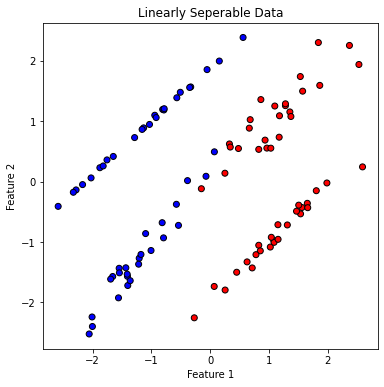

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Seperable Data")
plt.show()

In [4]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 2)
(30, 2)
(70,)
(30,)


In [5]:
# Initializing the model
svm = SVC(kernel='linear', C=1.0)

In [6]:
# Training the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
# Making Predictions
y_pred = svm.predict(X_test)
print(y_pred)

[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0]


In [8]:
# Computing Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model is:",acc)

Accuracy of the model is: 1.0


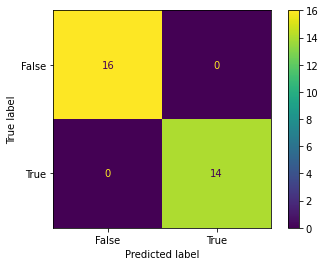

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Non Linear

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

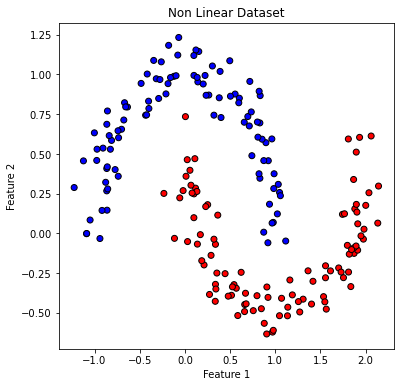

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non Linear Dataset")
plt.show()

In [12]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 2)
(60, 2)
(140,)
(60,)


In [13]:
# Initializing the mode
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

In [14]:
# Training the model
svm.fit(X_train, y_train)

SVC()

In [15]:
# Making Predictions
y_pred = svm.predict(X_test)
print(y_pred)

[1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1]


In [16]:
# calculating accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using RBF kernel is", acc)

Accuracy score using RBF kernel is 0.9833333333333333


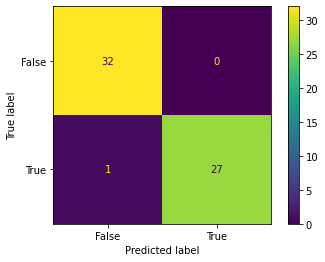

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Comparing kernels

In [18]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

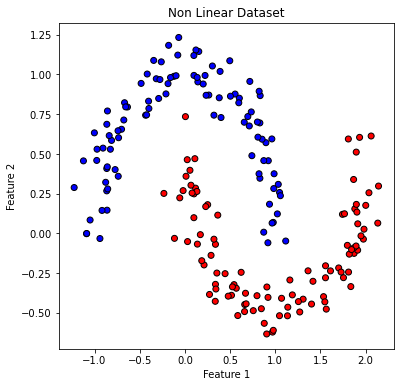

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non Linear Dataset")
plt.show()

In [20]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 2)
(60, 2)
(140,)
(60,)


In [21]:
# Initializing the models
svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

In [22]:
# Training the data
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC()

In [23]:
# Making Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [24]:
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_poly = accuracy_score(y_test, y_pred_poly)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracies:")
print("Linear kernel:", acc_linear)
print("Polynomial kernel:", acc_poly)
print("RBF kernel:", acc_rbf)

Accuracies:
Linear kernel: 0.8833333333333333
Polynomial kernel: 0.95
RBF kernel: 0.9833333333333333


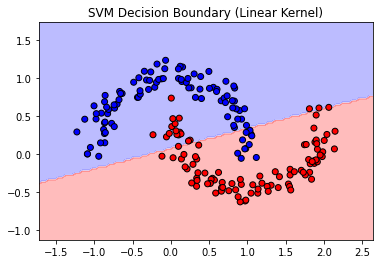

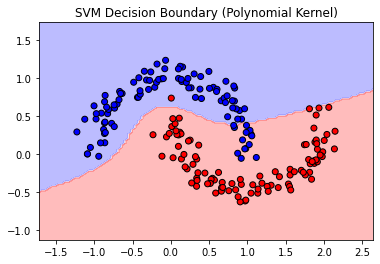

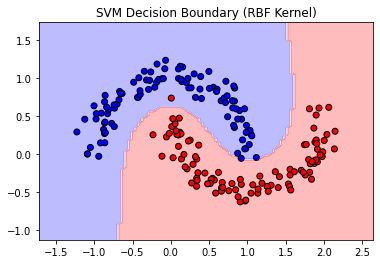

In [25]:
# plotting the svms
import numpy as np
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear, X, y, "SVM Decision Boundary (Linear Kernel)")
plot_decision_boundary(svm_poly, X, y, "SVM Decision Boundary (Polynomial Kernel)")
plot_decision_boundary(svm_rbf, X, y, "SVM Decision Boundary (RBF Kernel)")

# SVM using Breast Cancer Dataset

In [26]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

In [27]:
cancer = load_breast_cancer()
data = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
data['diagnosis'] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
# normalizing the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
x = data.copy()
x.drop(['diagnosis'], axis=1, inplace=True)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y = data['diagnosis']

In [29]:
df = pd.DataFrame(x_scaled, columns=data.columns[:-1])
df['diagnosis'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


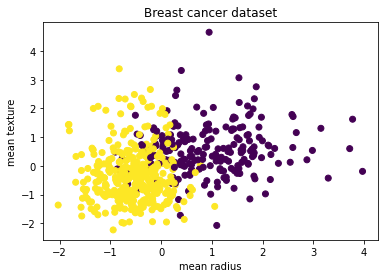

In [30]:
plt.scatter(df['mean radius'], df['mean texture'], c=y)
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.title("Breast cancer dataset")
plt.show()

In [31]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [32]:
# Initializing the model
svm_poly = SVC(kernel='poly', degree=3, C=0.1)
svm_rbf = SVC(kernel='rbf', C=0.1, gamma='scale')

In [33]:
# Training the data
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC(C=0.1)

In [34]:
# Making predictions
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf  = svm_rbf.predict(X_test)

In [35]:
# Calculating accuracy score
acc_poly = accuracy_score(y_test, y_pred_poly)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracies:")
print("Polynomial:", acc_poly)
print("RBF:", acc_rbf)

Accuracies:
Polynomial: 0.847953216374269
RBF: 0.9415204678362573


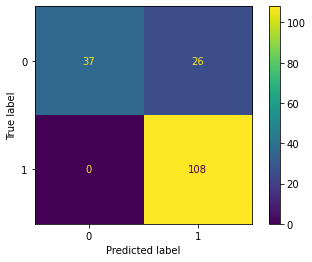

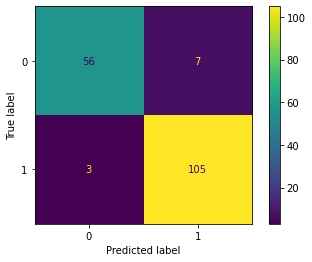

In [36]:
def plot_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    cmf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
    cmf_display.plot()
plot_confusion_matrix(y_test, y_pred_poly)
plot_confusion_matrix(y_test, y_pred_rbf)